DE Benchmark (from paper: https://www.pnas.org/doi/full/10.1073/pnas.1901979116)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
smw_file_name = '../single_mutation_walk/results_all.pkl'
reccombine_file_name = '../recombine_mutation/results.pkl'
nde_file_name = '../de/data/neighborhood_de/results_complete.pkl'
dm_file_name = '../de/data/neighborhood_de/results_distmax_1-5000.pkl'

with open(smw_file_name, 'rb') as f:
    smw_start_variants, smw_final_variants, smw_fitness_progressions = pickle.load(f)
with open(reccombine_file_name, 'rb') as f:
    recombine_best_variants, recombine_fitness_progressions = pickle.load(f)
with open(nde_file_name, 'rb') as f:
    nde_final_fitnesses, nde_screened = pickle.load(f)
with open(dm_file_name, 'rb') as f:
    dm_final_fitnesses, dm_screened = pickle.load(f)

In [15]:
N_BINS = 40
RANGE = [0., max([smw_fitness_progressions[i][-1] for i in range(len(smw_fitness_progressions))])]
MAX_FITNESS = 8.76196565571

all_counts = []
all_bins = []
all_bin_centers = []

all_sorted_fitnesses = []
all_cdf_values = []

colors = []
labels = []

def prepare_fitness(fitness_progressions):
    final_fitnesses = []
    for proression in fitness_progressions:
        final_fitnesses.append(proression[-1])

    return final_fitnesses

def prepare_hist_data(final_fitnesses):
    counts, bins = np.histogram(final_fitnesses, bins=N_BINS, range=RANGE)
    counts = counts / sum(counts)

    all_counts.append(counts)
    all_bins.append(bins)
    all_bin_centers.append((bins[:-1] + bins[1:]) / 2)

def prepare_cdf_data(final_fitnesses):
    final_fitnesses_sorted = np.sort(final_fitnesses)
    n = len(final_fitnesses_sorted)
    cdf_values = 1. * np.arange(n) / (n - 1)

    all_sorted_fitnesses.append(final_fitnesses_sorted)
    all_cdf_values.append(cdf_values)

def prepare_plot_data(final_fitnesses):
    prepare_hist_data(final_fitnesses)
    prepare_cdf_data(final_fitnesses)

prepare_plot_data(prepare_fitness(smw_fitness_progressions))
colors.append(('red', 1))
labels.append('DE: SMW')
prepare_plot_data(prepare_fitness(recombine_fitness_progressions))
colors.append(('blue', 0.75))
labels.append('DE: Recombine')
prepare_plot_data(nde_final_fitnesses * MAX_FITNESS)
colors.append(('green', 0.75))
labels.append('Neighborhood MLDE')
prepare_plot_data(dm_final_fitnesses * MAX_FITNESS)
colors.append(('purple', 1))
labels.append('Distmax')


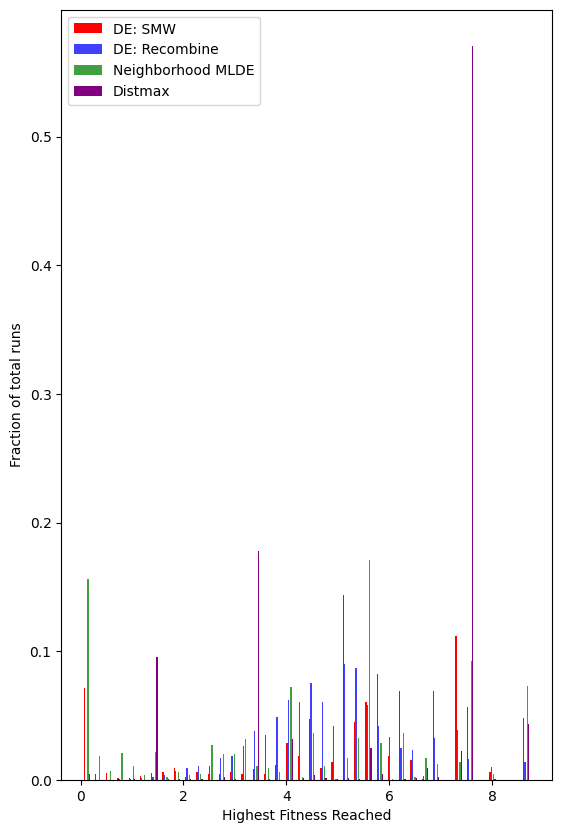

In [16]:
assert len(all_counts) == len(all_bins)
#bar_offsets = [-0.0375, 0.0375]
bar_offsets = [-0.05, -0.025, 0.025, 0.05]

fig = plt.figure(figsize=(10,10))
for i in range(len(all_counts)):
    # plt.stairs(all_counts[i], all_bins[i])
    plt.bar(
        all_bin_centers[i] + bar_offsets[i],
        all_counts[i],
        align="edge",
        width=0.025,
        color=colors[i] if len(colors) > i else None,
    )
plt.legend(labels)
plt.xlabel("Highest Fitness Reached")
plt.ylabel("Fraction of total runs")
#plt.title("Performance of traditional DE methods")
fig.axes[0].set_aspect(25)
plt.show()

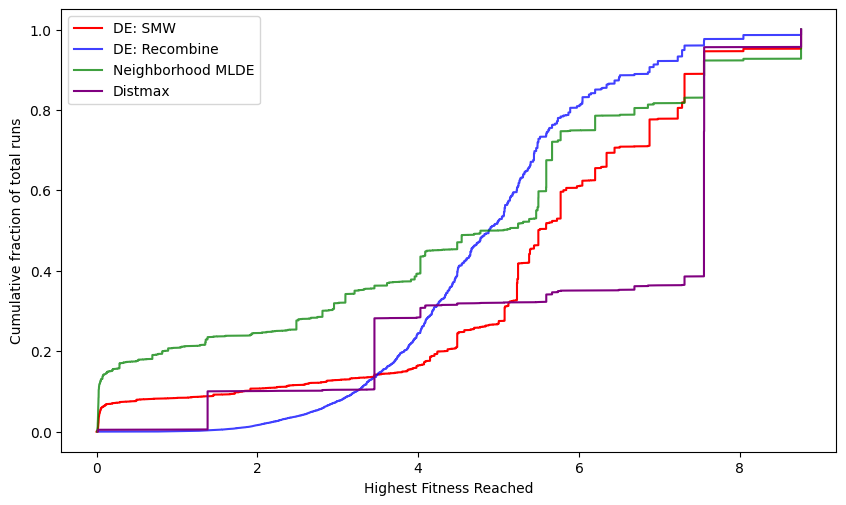

In [17]:
assert len(all_cdf_values) == len(all_sorted_fitnesses)

fig = plt.figure(figsize=(10, 10))
for i in range(len(all_cdf_values)):
    plt.plot(
        all_sorted_fitnesses[i],
        all_cdf_values[i],
        color=colors[i] if len(colors) > i else None,
    )
plt.legend(labels)
plt.xlabel("Highest Fitness Reached")
plt.ylabel("Cumulative fraction of total runs")
#plt.title("Performance of traditional DE methods")
fig.axes[0].set_aspect(5)
plt.show()